# ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_curve, auc, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

# **EDA**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
464,37,No,Travel_Rarely,799,Research & Development,1,3,Technical Degree,1,623,...,4,80,0,12,3,4,6,5,1,2
77,45,No,Travel_Rarely,193,Research & Development,6,4,Other,1,101,...,2,80,0,17,3,4,0,0,0,0
744,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1033,...,1,80,0,15,2,1,1,0,0,0
1082,23,No,Travel_Rarely,507,Research & Development,20,1,Life Sciences,1,1533,...,2,80,0,5,2,3,4,3,1,2
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,...,4,80,1,8,2,3,8,7,3,7


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### **About the Data**

| Column                 | Value | Label         |
|------------------------|-------|---------------|
| Education              | 1     | Below College |
|                        | 2     | College       |
|                        | 3     | Bachelor      |
|                        | 4     | Master        |
|                        | 5     | Doctor        |
| EnvironmentSatisfaction| 1     | Low           |
|                        | 2     | Medium        |
|                        | 3     | High          |
|                        | 4     | Very High     |
| JobInvolvement         | 1     | Low           |
|                        | 2     | Medium        |
|                        | 3     | High          |
|                        | 4     | Very High     |
| JobSatisfaction        | 1     | Low           |
|                        | 2     | Medium        |
|                        | 3     | High          |
|                        | 4     | Very High     |
| PerformanceRating      | 1     | Low           |
|                        | 2     | Good          |
|                        | 3     | Excellent     |
|                        | 4     | Outstanding   |
| RelationshipSatisfaction| 1     | Low           |
|                        | 2     | Medium        |
|                        | 3     | High          |
|                        | 4     | Very High     |
| WorkLifeBalance        | 1     | Bad           |
|                        | 2     | Good          |
|                        | 3     | Better        |
|                        | 4     | Best          |

#### **Discovering the data**

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.duplicated().sum()

np.int64(0)



*   No Duplicated and null values

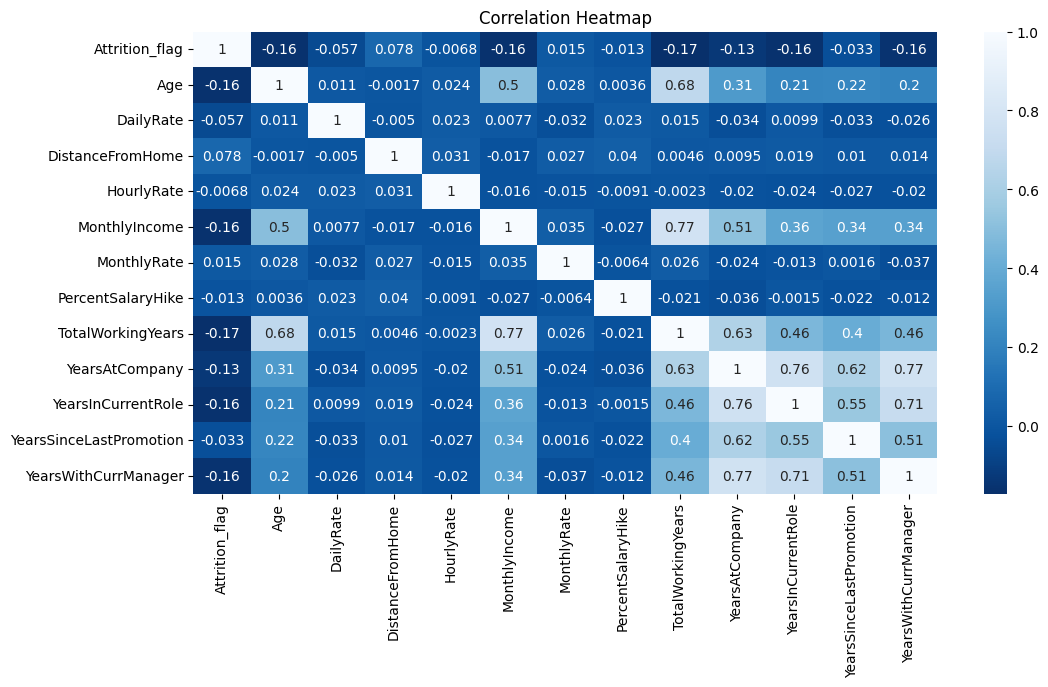

In [ ]:
# @title
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})
numerical_cols = ['Attrition_flag','Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues_r')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# @title
columns = ['Attrition','BusinessTravel','Department','Education','EducationField',
           'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole',
           'JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PercentSalaryHike',
           'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear',
           'WorkLifeBalance']
print("Value counts for each column:")
for col in columns:
    print(df[col].value_counts())
    print("-" * 30)

Value counts for each column:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------------
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
------------------------------
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
------------------------------
JobInvolvement
3    868
2    375
4

In [ ]:
for column in df.columns:
  if df[column].is_unique:
    print(column)

EmployeeNumber


#
* it is unique for each employee
#

In [ ]:
for column in df.columns:
  if df[column].nunique() == 1:
    print(column)

EmployeeCount
Over18
StandardHours


In [ ]:
print("EmployeeCount unique values:", df['EmployeeCount'].unique())
print("Over18 unique values:", df['Over18'].unique())
print("StandardHours unique values:", df['StandardHours'].unique())

EmployeeCount unique values: [1]
Over18 unique values: ['Y']
StandardHours unique values: [80]


#
* it is only have one value
#

In [ ]:
df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours','Attrition_flag'],axis=1,inplace=True)

# **Categorize some features**

In [ ]:
df_categorized = df.copy()

In [ ]:
for column in df_categorized.columns:
  if df_categorized[column].nunique() > 14:
    print(column)

Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
PercentSalaryHike
TotalWorkingYears
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


Column: Age


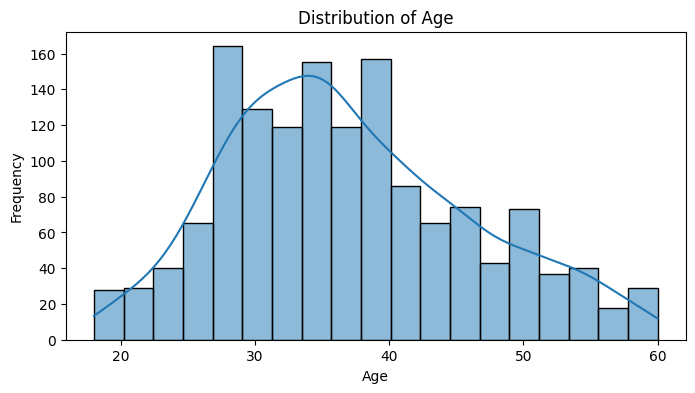

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
--------------------------------------------------
Column: DailyRate


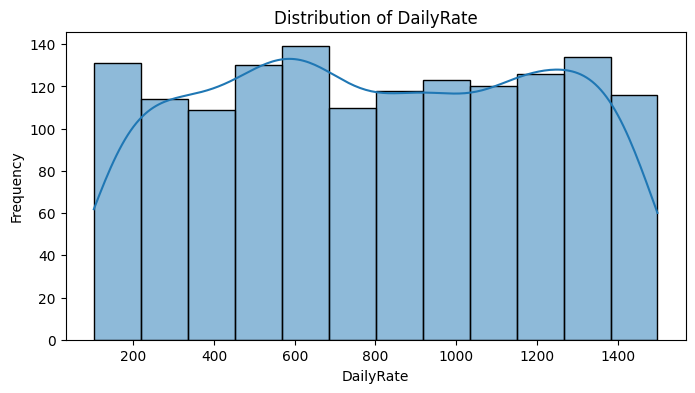

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64
--------------------------------------------------
Column: DistanceFromHome


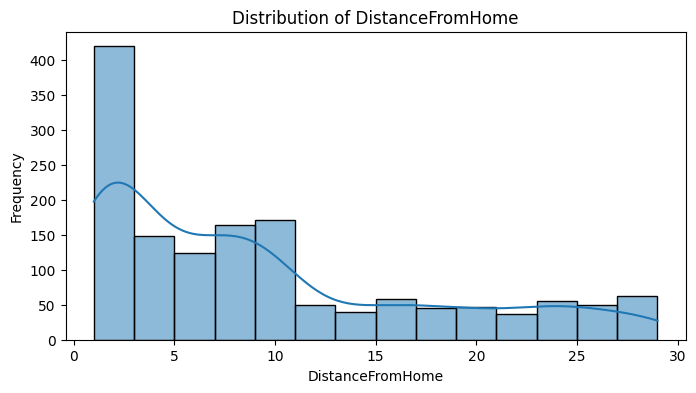

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
--------------------------------------------------
Column: HourlyRate


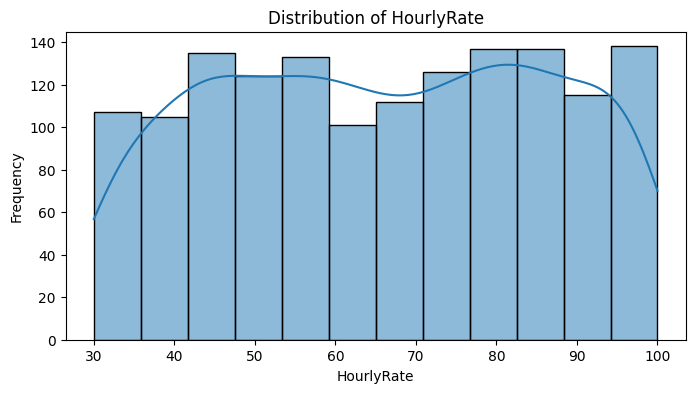

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64
--------------------------------------------------
Column: MonthlyIncome


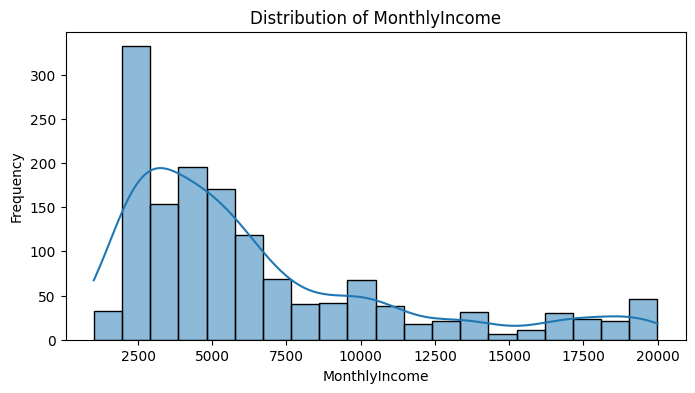

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64
--------------------------------------------------
Column: MonthlyRate


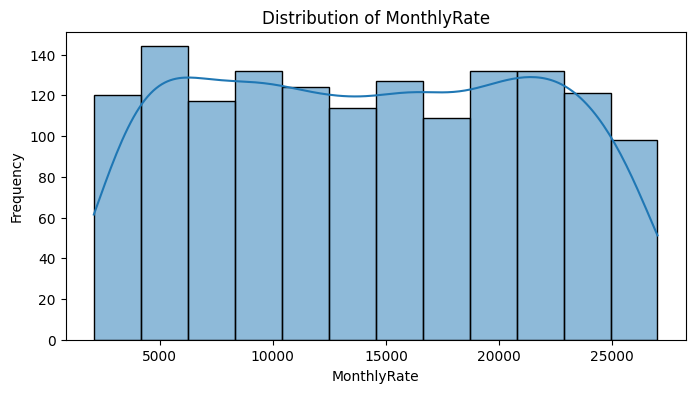

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64
--------------------------------------------------
Column: PercentSalaryHike


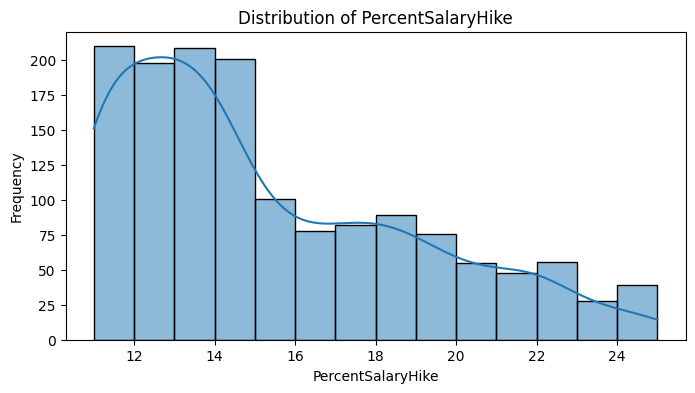

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64
--------------------------------------------------
Column: TotalWorkingYears


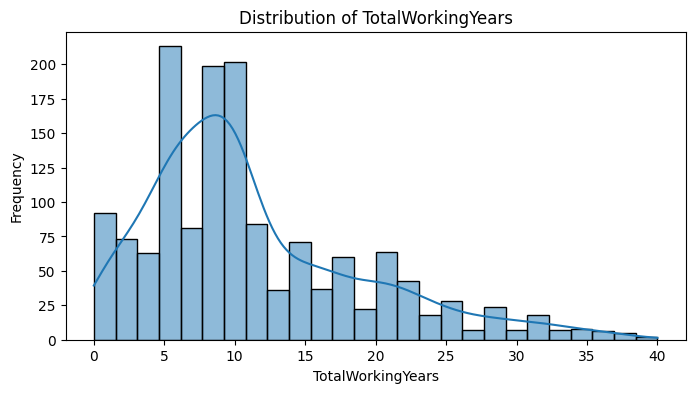

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64
--------------------------------------------------
Column: YearsAtCompany


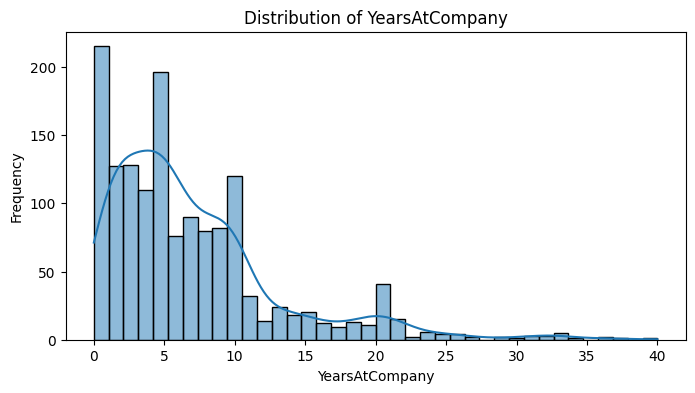

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64
--------------------------------------------------
Column: YearsInCurrentRole


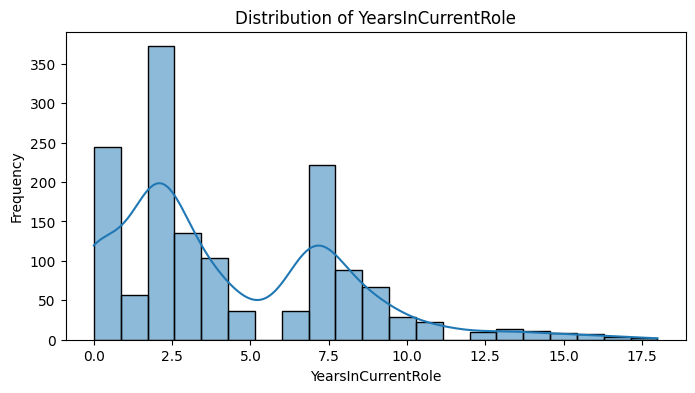

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64
--------------------------------------------------
Column: YearsSinceLastPromotion


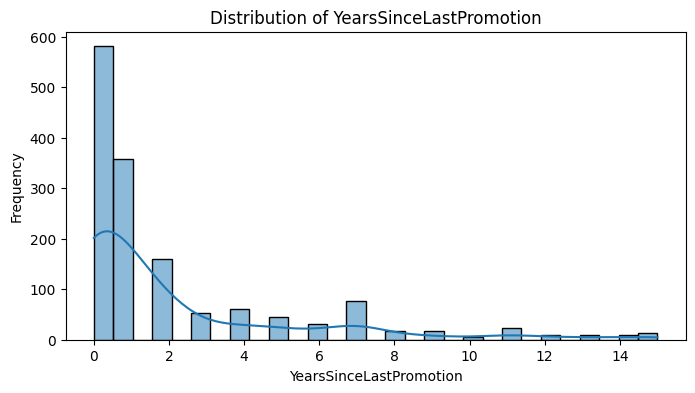

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64
--------------------------------------------------
Column: YearsWithCurrManager


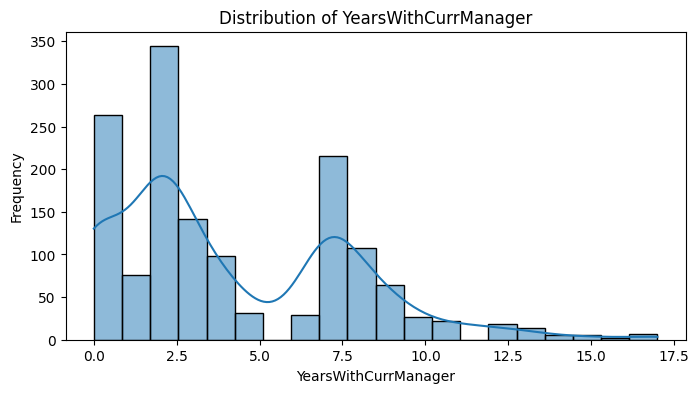

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64
--------------------------------------------------


In [ ]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numerical_cols:
    print(f"Column: {col}")
    plt.figure(figsize=(8, 4))
    sns.histplot(df_categorized[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(df_categorized[col].describe())
    print("-" * 50)

In [ ]:
numerical_bins_labels = {}

numerical_bins_labels['Age'] = {'bins': [18, 30, 40, 50, 60], 'labels': ['youth', 'adult', 'old', 'over 50']}
numerical_bins_labels['DailyRate'] = {'bins': [102, 500, 1000, 1500], 'labels': ['Low', 'Medium', 'High']}
numerical_bins_labels['DistanceFromHome'] = {'bins': [1, 5, 15, 30], 'labels': ['Close', 'Near', 'Far']}
numerical_bins_labels['HourlyRate'] = {'bins': [30, 50, 70, 90, 100], 'labels': ['Low', 'Medium-Low', 'Medium-High', 'High']}
numerical_bins_labels['MonthlyIncome'] = {'bins': [1000, 4000, 8000, 12000, 16000, 20000], 'labels': ['Very Low', 'Low', 'Medium', 'High', 'Very High']}
numerical_bins_labels['MonthlyRate'] = {'bins': [290, 7000, 14000, 21000, 27000], 'labels': ['Low', 'Medium-Low', 'Medium-High', 'High']}
numerical_bins_labels['PercentSalaryHike'] = {'bins': [11, 15, 20, 25], 'labels': ['Low', 'Medium', 'High']}
numerical_bins_labels['TotalWorkingYears'] = {'bins': [0, 5, 10, 20, 40], 'labels': ['Beginner', 'Junior', 'Senior', 'Expert']}
numerical_bins_labels['YearsAtCompany'] = {'bins': [0, 3, 7, 15, 40], 'labels': ['New', 'Experienced', 'Veteran', 'Long-term']}
numerical_bins_labels['YearsInCurrentRole'] = {'bins': [0, 2, 5, 10, 18], 'labels': ['New', 'Experienced', 'Veteran', 'Long-term']}
numerical_bins_labels['YearsSinceLastPromotion'] = {'bins': [0, 1, 5, 15], 'labels': ['Recent', 'Experienced', 'Long-ago']}
numerical_bins_labels['YearsWithCurrManager'] = {'bins': [0, 2, 5, 10, 17], 'labels': ['New', 'Experienced', 'Veteran', 'Long-term']}

print(numerical_bins_labels)

{'Age': {'bins': [18, 30, 40, 50, 60], 'labels': ['youth', 'adult', 'old', 'over 50']}, 'DailyRate': {'bins': [102, 500, 1000, 1500], 'labels': ['Low', 'Medium', 'High']}, 'DistanceFromHome': {'bins': [1, 5, 15, 30], 'labels': ['Close', 'Near', 'Far']}, 'HourlyRate': {'bins': [30, 50, 70, 90, 100], 'labels': ['Low', 'Medium-Low', 'Medium-High', 'High']}, 'MonthlyIncome': {'bins': [1000, 4000, 8000, 12000, 16000, 20000], 'labels': ['Very Low', 'Low', 'Medium', 'High', 'Very High']}, 'MonthlyRate': {'bins': [290, 7000, 14000, 21000, 27000], 'labels': ['Low', 'Medium-Low', 'Medium-High', 'High']}, 'PercentSalaryHike': {'bins': [11, 15, 20, 25], 'labels': ['Low', 'Medium', 'High']}, 'TotalWorkingYears': {'bins': [0, 5, 10, 20, 40], 'labels': ['Beginner', 'Junior', 'Senior', 'Expert']}, 'YearsAtCompany': {'bins': [0, 3, 7, 15, 40], 'labels': ['New', 'Experienced', 'Veteran', 'Long-term']}, 'YearsInCurrentRole': {'bins': [0, 2, 5, 10, 18], 'labels': ['New', 'Experienced', 'Veteran', 'Long-te

In [ ]:
for col, bin_info in numerical_bins_labels.items():
    df_categorized[col+"_"] = pd.cut(df[col], bins=bin_info['bins'], labels=bin_info['labels'], include_lowest=True)
display(df_categorized.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,DistanceFromHome_,HourlyRate_,MonthlyIncome_,MonthlyRate_,PercentSalaryHike_,TotalWorkingYears_,YearsAtCompany_,YearsInCurrentRole_,YearsSinceLastPromotion_,YearsWithCurrManager_
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Close,High,Low,Medium-High,Low,Junior,Experienced,Experienced,Recent,Experienced
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,Near,Medium-Low,Low,High,High,Junior,Veteran,Veteran,Recent,Veteran
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Close,High,Very Low,Low,Low,Junior,New,New,Recent,New
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Close,Medium-Low,Very Low,High,Low,Junior,Veteran,Veteran,Experienced,New
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,Close,Low,Very Low,Medium-High,Low,Junior,New,New,Experienced,New


In [ ]:
for col in numerical_bins_labels.keys():
    categorical_col_name = col+"_"
    print(f"Value counts for {categorical_col_name}:")
    print(df_categorized[categorical_col_name].value_counts())
    print("-" * 30)

Value counts for Age_:
Age_
adult      619
youth      386
old        322
over 50    143
Name: count, dtype: int64
------------------------------
Value counts for DailyRate_:
DailyRate_
Medium    542
High      523
Low       405
Name: count, dtype: int64
------------------------------
Value counts for DistanceFromHome_:
DistanceFromHome_
Close    632
Near     509
Far      329
Name: count, dtype: int64
------------------------------
Value counts for HourlyRate_:
HourlyRate_
Medium-High    434
Low            409
Medium-Low     408
High           219
Name: count, dtype: int64
------------------------------
Value counts for MonthlyIncome_:
MonthlyIncome_
Low          546
Very Low     543
Medium       186
Very High    126
High          69
Name: count, dtype: int64
------------------------------
Value counts for MonthlyRate_:
MonthlyRate_
Medium-Low     418
Medium-High    408
High           341
Low            303
Name: count, dtype: int64
------------------------------
Value counts for Percent

# **Some Business Questions**

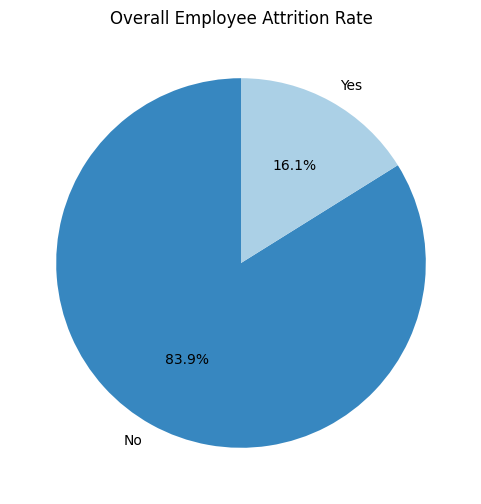

In [ ]:
attrition_counts = df_categorized['Attrition'].value_counts()
attrition_percentage = attrition_counts / attrition_counts.sum() * 100

plt.figure(figsize=(6, 6))
plt.pie(attrition_percentage, labels=attrition_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues_r', 2))
plt.title('Overall Employee Attrition Rate')
plt.show()

**Does the Income effect on Attrition Rate ?**




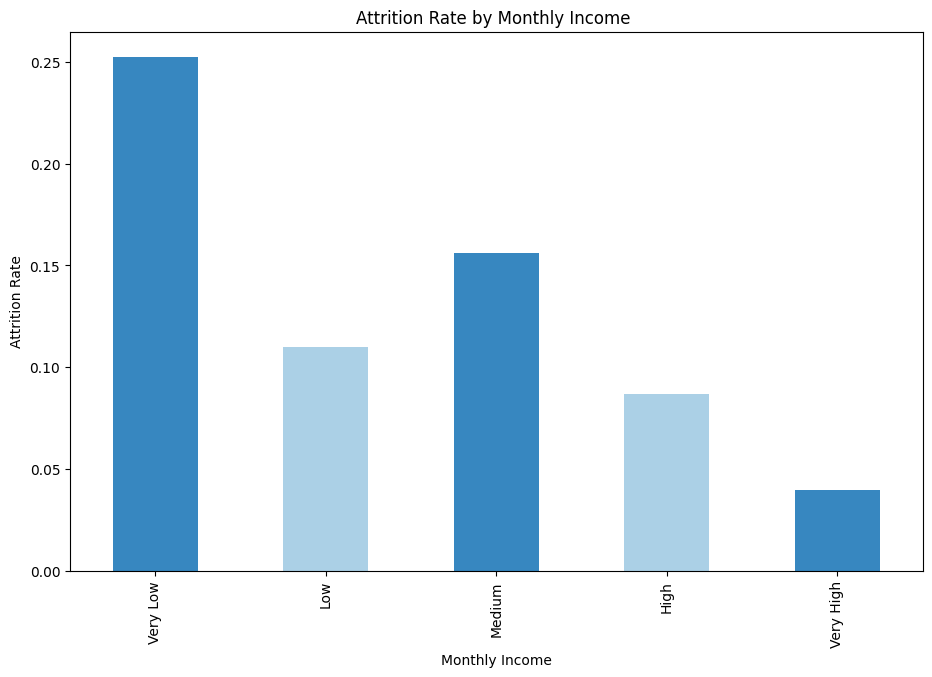

In [ ]:
income_attrition = df_categorized.groupby("MonthlyIncome_")["Attrition"].value_counts(normalize=True).unstack()
income_attrition["Yes"].plot(kind="bar", figsize=(11,7), color=sns.color_palette('Blues_r', 2))
plt.title("Attrition Rate by Monthly Income ")
plt.xlabel("Monthly Income")
plt.ylabel("Attrition Rate")
plt.show()

##### **How much attrition according to each department?** 1

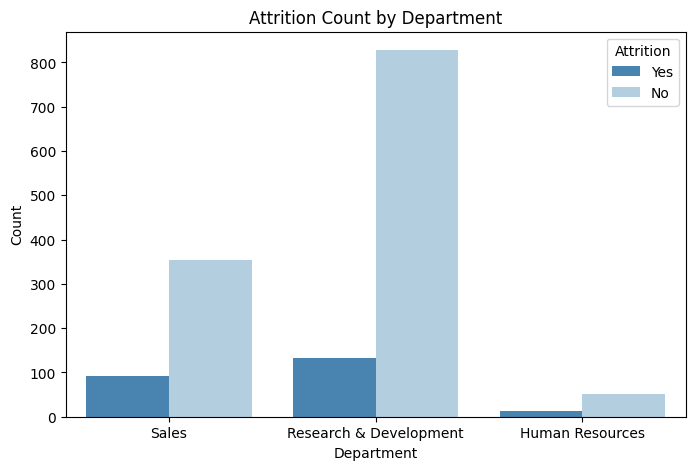

In [ ]:
# @title
plt.figure(figsize=(8, 5))
sns.countplot(data=df_categorized, x='Department', hue='Attrition', palette='Blues_r')
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

Attrition                 No   Yes
Department                        
Human Resources         81.0  19.0
Research & Development  86.2  13.8
Sales                   79.4  20.6


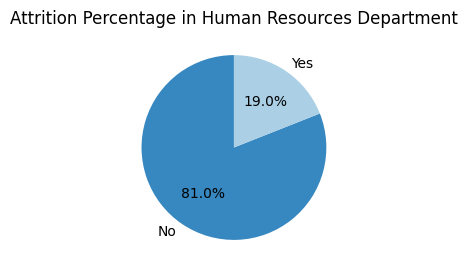

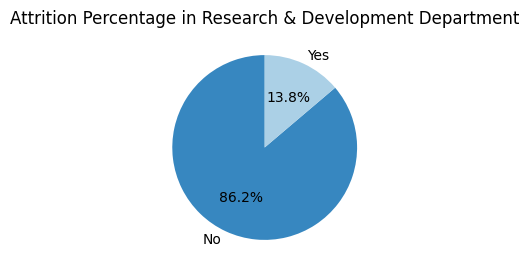

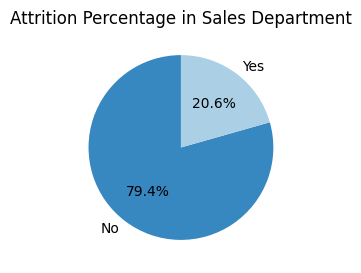

In [ ]:
# @title
attrition_by_department = df_categorized.groupby('Department')['Attrition'].value_counts(normalize=True).mul(100).round(1).unstack()
print(attrition_by_department)
for department in attrition_by_department.index:
    plt.figure(figsize=(3, 3))
    plt.pie(attrition_by_department.loc[department], labels=attrition_by_department.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues_r', 2))
    plt.title(f'Attrition Percentage in {department} Department')
    plt.show()

#### **Does attrition vary by gender?** 1



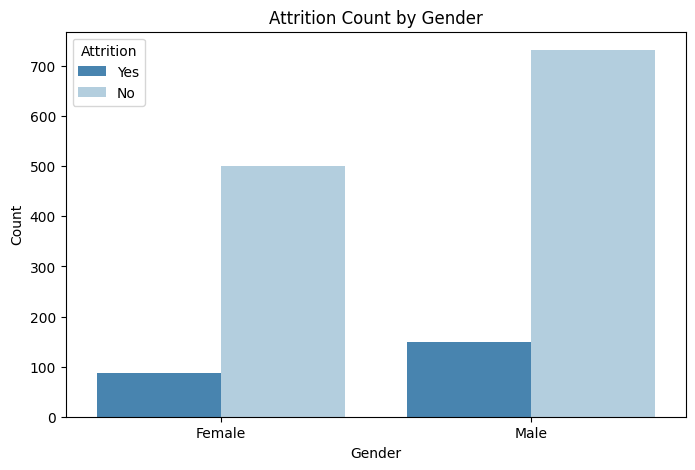

In [ ]:
# @title
plt.figure(figsize=(8, 5))
sns.countplot(data=df_categorized, x='Gender', hue='Attrition', palette='Blues_r')
plt.title('Attrition Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

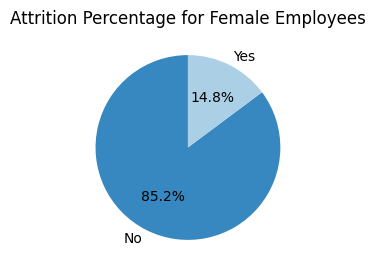

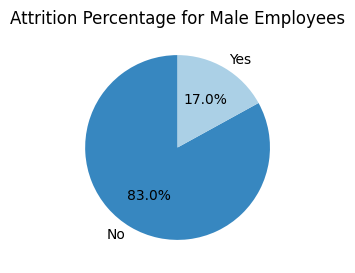

Attrition Percentage by Gender:
Attrition    No   Yes
Gender               
Female     85.2  14.8
Male       83.0  17.0


In [ ]:
# @title
attrition_by_gender=df_categorized.groupby('Gender')['Attrition'].value_counts(normalize=True).mul(100).round(1).unstack()

for gender in attrition_by_gender.index:
    plt.figure(figsize=(3, 3))
    plt.pie(attrition_by_gender.loc[gender], labels=attrition_by_gender.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues_r', 2))
    plt.title(f'Attrition Percentage for {gender} Employees')
    plt.show()

print(f"Attrition Percentage by Gender:")
print(attrition_by_gender)

#### **How does salary differ by education level?**:

  Education_label  MonthlyIncome
0        Bachelor    6517.263986
1   Below College    5640.570588
2         College    6226.645390
3          Doctor    8277.645833
4          Master    6832.402010


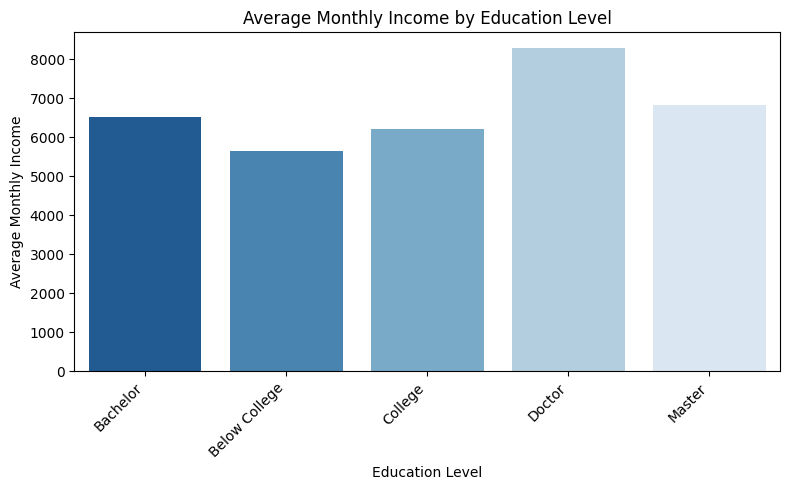

In [ ]:
# Calculate average monthly income by education level
Education_Label = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
df_categorized['Education_label'] = df_categorized['Education'].apply(lambda x: Education_Label[x-1])
average_income_by_education = df_categorized.groupby('Education_label')['MonthlyIncome'].mean().reset_index()

print(average_income_by_education)

plt.figure(figsize=(8, 5))
sns.barplot(data=average_income_by_education, x='Education_label', y='MonthlyIncome', palette='Blues_r')
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Is Employee Attrition effected by Education?**

  Education_label  Count  Attrition_Count  Attrition_Rate
0        Bachelor    572               99        0.173077
1   Below College    170               31        0.182353
2         College    282               44        0.156028
3          Doctor     48                5        0.104167
4          Master    398               58        0.145729


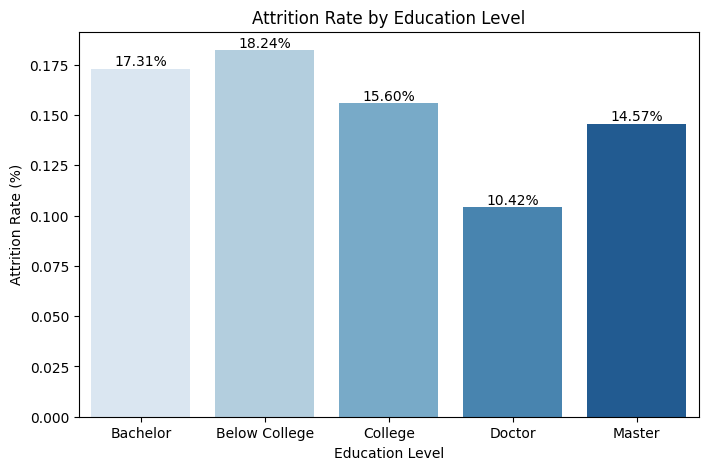

In [ ]:
# @title
edu_group = df_categorized.groupby("Education_label").agg(
    Count=("Attrition", "count"),
    Attrition_Count=("Attrition", lambda x: (x == "Yes").sum())
).reset_index()

edu_group["Attrition_Rate"] = edu_group["Attrition_Count"] / edu_group["Count"]

print(edu_group)
plt.figure(figsize=(8,5))
ax = sns.barplot(data=edu_group, x="Education_label", y="Attrition_Rate", palette="Blues")


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black")

plt.title("Attrition Rate by Education Level")

plt.ylabel("Attrition Rate (%)")
plt.xlabel("Education Level")
plt.show()



#### **Do younger employees (age + Years of Experience) leave more?**

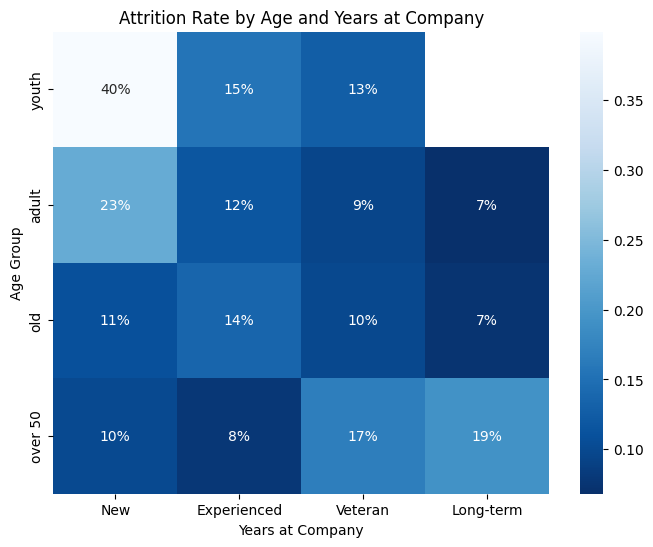

In [ ]:
df_categorized['Age_'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60], labels=['youth', 'adult', 'old', 'over 50'], include_lowest=True)
df_categorized['YearsAtCompany_'] = pd.cut(df['YearsAtCompany'], bins=[0, 3, 7, 15, 40], labels=['New', 'Experienced', 'Veteran', 'Long-term'], include_lowest=True)

heatmap_data = df_categorized.pivot_table(values='Attrition',
                              index='Age_',
                              columns='YearsAtCompany_',
                              aggfunc=lambda x: (x=='Yes').mean())

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues_r", fmt=".0%")
plt.title("Attrition Rate by Age and Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Age Group")
plt.show()

####**What isthe attrition rate for each age group ?**



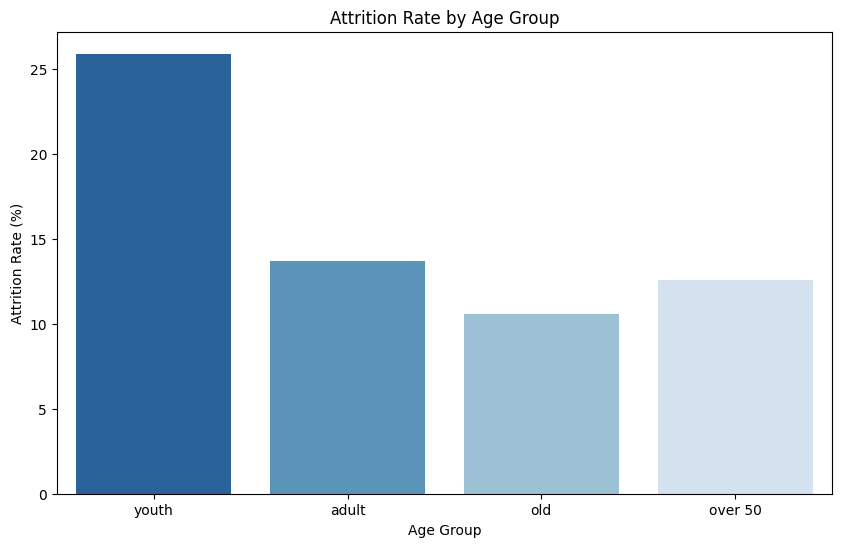

In [ ]:
# @title
attrition_rate_by_age = df_categorized.groupby('Age_')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_age.index, y=attrition_rate_by_age.values, palette='Blues_r')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.show()

#### **What is the attrition rate for each Years at company category and attrition within each category?**



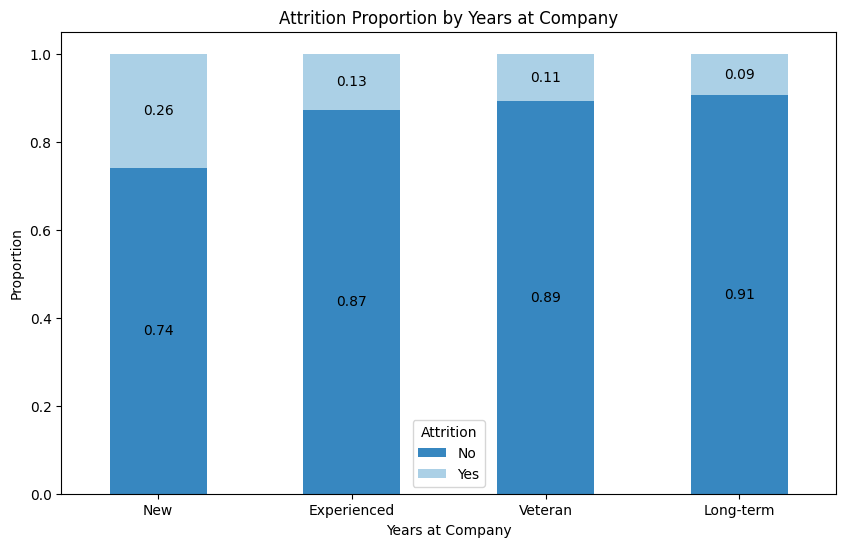

In [ ]:

attrition_by_tenure = df_categorized.groupby('YearsAtCompany_')['Attrition'].value_counts(normalize=True).unstack()

ax = attrition_by_tenure.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('Blues_r', 2))
plt.title('Attrition Proportion by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
plt.show()

#### **what is Attrition Proportion Employees by Age Group?**


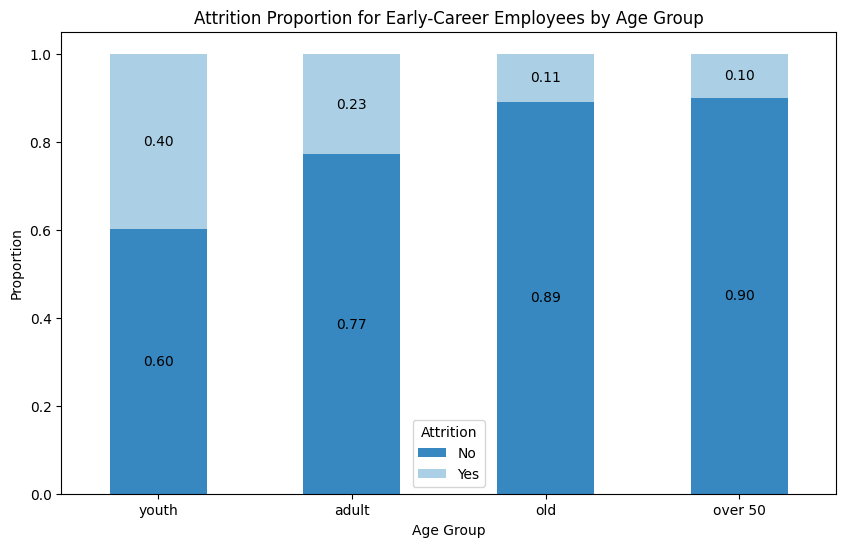

In [ ]:
# @title
new_employees_df = df_categorized[df_categorized['YearsAtCompany_'] == 'New']
attrition_by_age_new = new_employees_df.groupby('Age_')['Attrition'].value_counts(normalize=True).unstack()

ax = attrition_by_age_new.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('Blues_r', 2))
plt.title('Attrition Proportion for Early-Career Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.show()

#### **What is the attrition rate for each percentage salary hike?**


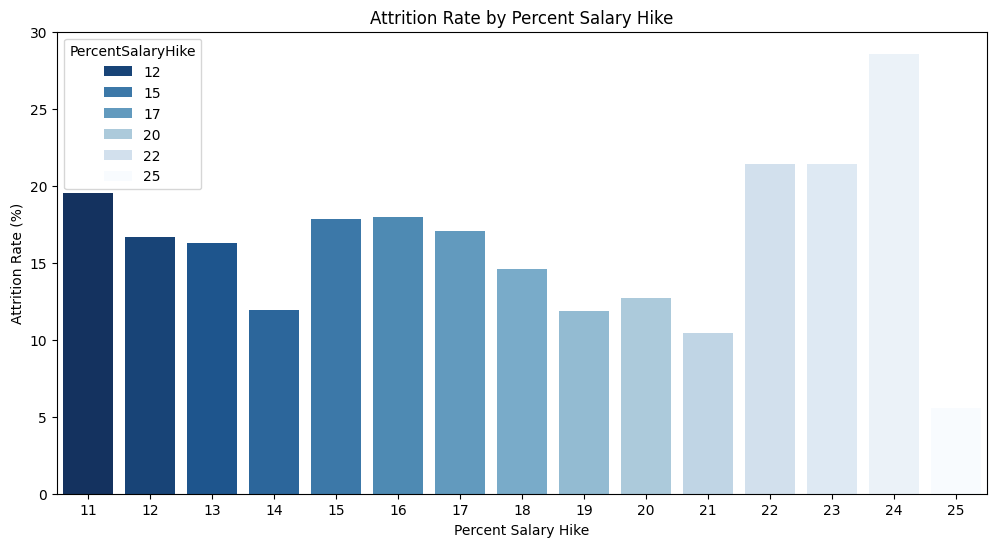

In [ ]:
# @title
attrition_rate_by_hike = df_categorized.groupby('PercentSalaryHike')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=attrition_rate_by_hike.index, y=attrition_rate_by_hike.values,hue=attrition_rate_by_hike.index, palette='Blues_r')
plt.title('Attrition Rate by Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition Rate (%)')
plt.show()

#### **What is attrition rate by total working years?**



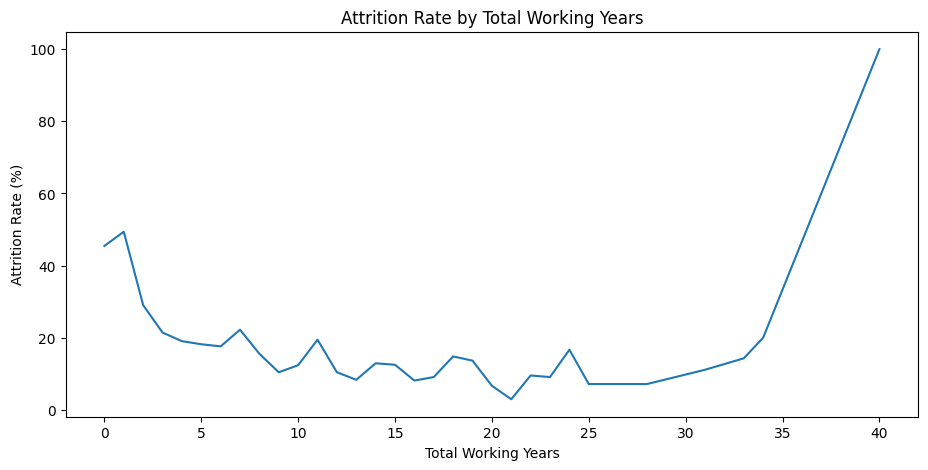

In [ ]:
# @title
attrition_rate_by_total_working_years = df_categorized.groupby('TotalWorkingYears')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(11, 5))
sns.lineplot(x=attrition_rate_by_total_working_years.index, y=attrition_rate_by_total_working_years.values, palette='Blues_r')
plt.title('Attrition Rate by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition Rate (%)')
plt.show()

#### **What is attrition rate for each business travel frequency?**



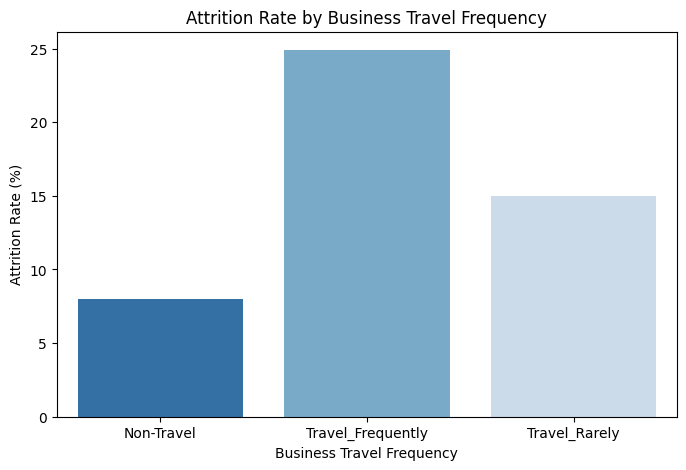

In [ ]:
# @title
attrition_by_travel = df_categorized.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_by_travel.index, y=attrition_by_travel.values, palette='Blues_r')
plt.title('Attrition Rate by Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate (%)')
plt.show()

####**What is the attrition percentages for each work-life balance category?**



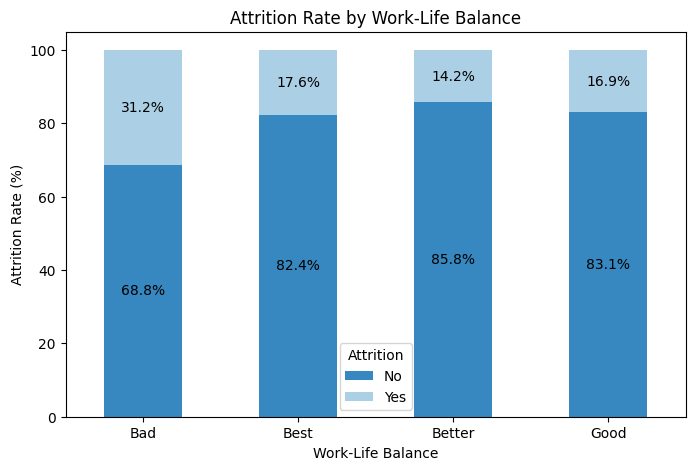

In [ ]:
# @title
balance_levels = ['Bad','Good','Better','Best']
df_categorized['WorkLifeBalance_levels'] = df_categorized['WorkLifeBalance'].apply(lambda x: balance_levels[x-1])
attrition_by_worklife = df_categorized.groupby('WorkLifeBalance_levels')['Attrition'].value_counts(normalize=True).unstack() * 100

ax = attrition_by_worklife.plot(kind='bar', stacked=True, figsize=(8, 5), color=sns.color_palette('Blues_r', 2))
plt.title('Attrition Rate by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

####**Is job satisfacationeffect on the attrition?**



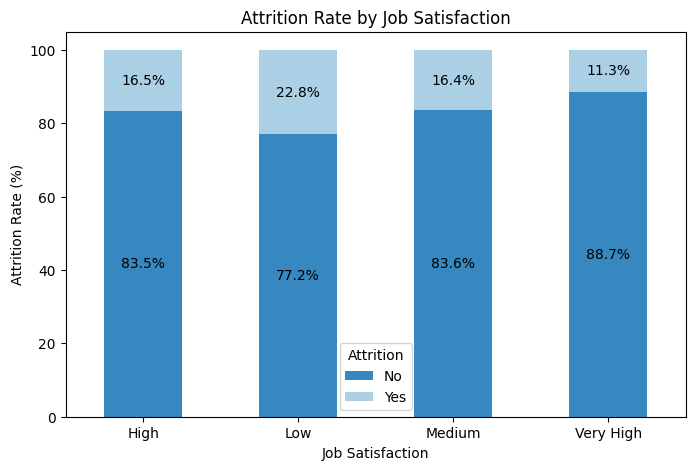

In [ ]:
satisfaction_levels = ['Low','Medium','High','Very High']
df_categorized['JobSatisfaction_levels'] = df_categorized['JobSatisfaction'].apply(lambda x: satisfaction_levels[x-1])
attrition_by_job_satisfaction = df_categorized.groupby('JobSatisfaction_levels')['Attrition'].value_counts(normalize=True).unstack() * 100

ax = attrition_by_job_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 5), color=sns.color_palette('Blues_r', 2))
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

<Figure size 1700x1700 with 0 Axes>

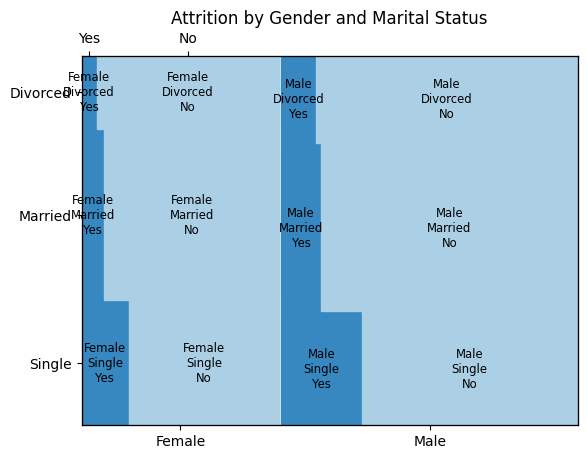

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(17,17))
mosaic(df_categorized, ['Gender','MaritalStatus','Attrition'], properties=lambda key: {'color': sns.palettes.color_palette('Blues_r', 2)[0] if 'Yes' in key else sns.palettes.color_palette('Blues_r', 2)[1]})
plt.title("Attrition by Gender and Marital Status")
plt.show()

#### **Which departments have higher or lower employee attrition compared to the company average?**

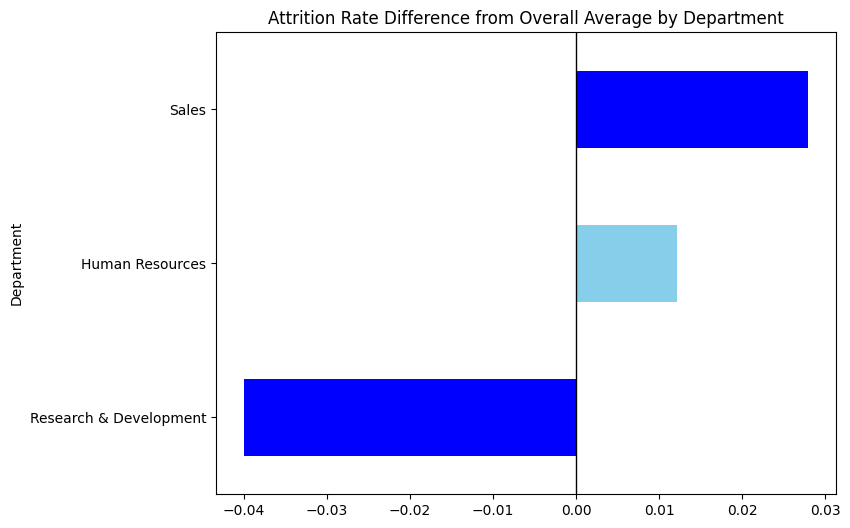

In [ ]:
attr_rates = df_categorized.groupby('Department')['Attrition'].apply(lambda x: (x=="Yes").mean())
diff = attr_rates - attr_rates.mean()

plt.figure(figsize=(8,6))
diff.sort_values().plot(kind='barh', color=diff.apply(lambda x: 'blue' if x>0 else 'skyblue'))
plt.axvline(0, color='black', linewidth=1)
plt.title("Attrition Rate Difference from Overall Average by Department")
plt.show()

### ***Conclusion***

*   The overall employee attrition rate is 16.1%.
*   Employees with lower monthly incomes appear to have a higher tendency to resign.
*   Employees who travel frequently for business have a significantly higher attrition rate compared to those who travel rarely or not at all.
*   The attrition rate generally decreases as the total working years increase.
*   Employees in the Sales department show the highest attrition rate among all departments.
*   There is a visible trend that employees with lower work-life balance scores (indicating poorer balance) tend to have a higher proportion of attrition.
*   Employees with lower job satisfaction scores show a higher proportion of attrition compared to those with higher satisfaction scores.
*   Early-career employees (0-3 years tenure) in the 25-34 and 35-44 age groups show notable attrition proportions.


# **Encoding**

In [ ]:

# pd.set_option('display.max_columns', None)
# df_categorized.head()

In [ ]:
df_=df.copy()
df_['Attrition'] = df_['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_['Gender'] = df_['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_['OverTime'] = df_['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_.drop(df[['OverTime','Gender']],axis=1,inplace=True)


In [ ]:
X = df_.drop('Attrition',axis=1)
y = df_['Attrition']

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)



**Split the data**

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17,stratify=y)

In [ ]:
pd.set_option('display.max_columns', None)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1095,33,589,28,4,2,79,3,2,3,5207,22949,1,12,3,2,1,15,3,3,15,14,5,7,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1317,27,1297,5,2,4,53,3,1,4,2379,19826,0,14,3,3,0,6,3,2,5,4,0,2,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
863,33,147,2,3,2,99,3,1,3,3600,8429,1,13,3,4,1,5,2,3,5,4,1,4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
287,38,688,23,4,4,82,3,2,4,5745,18899,9,14,3,2,1,10,2,3,2,2,1,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
599,36,1041,13,3,3,36,3,1,2,2143,25527,4,13,3,2,1,8,2,3,5,2,0,4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [ ]:
df.shape

(1470, 31)

# **scaling**

In [ ]:
Scaling_features =['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                    'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
sscaler = StandardScaler()
X_train = X_train.copy()
X_test = X_test.copy()

X_train[Scaling_features] = sscaler.fit_transform(X_train[Scaling_features])
X_test[Scaling_features] = sscaler.transform(X_test[Scaling_features])

In [ ]:
# mmscaler = MinMaxScaler()

# X_train[Scaling_features] = mmscaler.fit_transform(X_train[Scaling_features])
# X_test[Scaling_features] = mmscaler.transform(X_test[Scaling_features])

# **Comparing models**

In [ ]:
algorithms ={
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [ ]:
result =[]

for algo_name , algo in algorithms.items():
  algo.fit(X_train,y_train)
  y_train_pred = algo.predict(X_train)
  y_test_pred =algo.predict(X_test)
  train_accuracy = accuracy_score(y_train , y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  print(f"Train Accuracy {algo_name}: {train_accuracy:.4f}")
  print(f"Test Accuracy {algo_name}: {test_accuracy:.4f}")
  print("-"*50)
  result.append([algo_name,train_accuracy,test_accuracy])
  # precision = precision_score(y_test,y_pred)
  # recall = recall_score(y_test,y_pred)

Train Accuracy Random Forest: 1.0000
Test Accuracy Random Forest: 0.8605
--------------------------------------------------
Train Accuracy Logistic Regression: 0.8673
Test Accuracy Logistic Regression: 0.8469
--------------------------------------------------
Train Accuracy Gradient Boosting: 0.9379
Test Accuracy Gradient Boosting: 0.8571
--------------------------------------------------
Train Accuracy SVM: 0.8384
Test Accuracy SVM: 0.8401
--------------------------------------------------
Train Accuracy KNN: 0.8690
Test Accuracy KNN: 0.8367
--------------------------------------------------


# **Random Forest**

Cross-validation scores: [0.88559322 0.82553191 0.8212766  0.83829787 0.87659574]


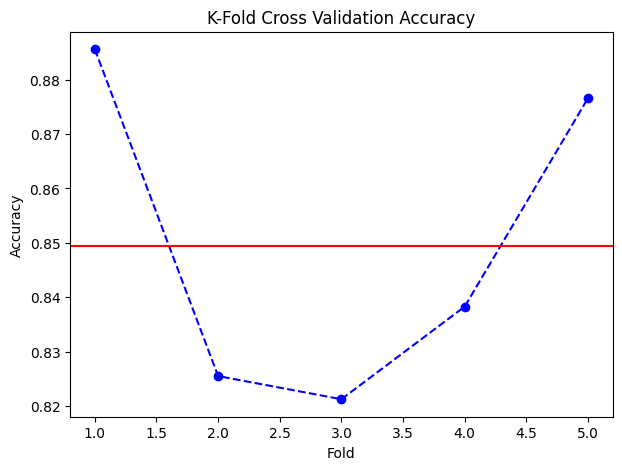

In [ ]:
RF = RandomForestClassifier(random_state=42)

KF = KFold(n_splits=5,shuffle=True,random_state=42)

cv_scores = cross_val_score(RF, X_train, y_train, cv=KF, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='--', color='b')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-')
plt.title("K-Fold Cross Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

**Grid Search**

In [ ]:
param_grid = {
    'n_estimators': [100, 50, 70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [7, 9, 10],
    'min_samples_leaf': [5, 7, 9]
}

grid_search = GridSearchCV(estimator=RF, param_grid = param_grid, cv=2, n_jobs=-1,scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Accuracy (Grid Search):", grid_search.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters (Grid Search): {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 50}
Best Accuracy (Grid Search): 0.8469387755102041


**Random Search**

In [ ]:
param_dist = {
    'n_estimators': np.arange(50,100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [7, 10, 15],
    'min_samples_leaf': [3 ,5, 7]
}

random_search = RandomizedSearchCV(estimator=RF , param_distributions=param_dist,n_iter = 33 ,scoring='accuracy',cv= 2, n_jobs=-1,verbose=2)

random_search.fit(X_train, y_train)

print(f"Best Parameters (Random Search):", random_search.best_params_)
print("Best Accuracy (Random Search):", random_search.best_score_)

Fitting 2 folds for each of 33 candidates, totalling 66 fits
Best Parameters (Random Search): {'n_estimators': np.int64(73), 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 30}
Best Accuracy (Random Search): 0.8494897959183674


**Evaluations**

Train Accuracy: 0.9013605442176871
Test Accuracy: 0.8503401360544217
Confusion Matrix:


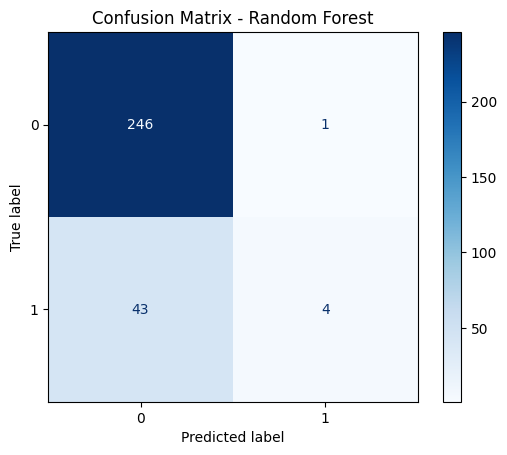

In [ ]:
rf = RandomForestClassifier(n_estimators= random_search.best_params_['n_estimators'], min_samples_split= random_search.best_params_['min_samples_split'], min_samples_leaf= random_search.best_params_['min_samples_leaf'], max_depth= random_search.best_params_['max_depth'], random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
clf_reort= classification_report(y_test,y_pred)
print("classification_report")
print(clf_reort)

classification_report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.80      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.83      0.54      0.54       294
weighted avg       0.84      0.85      0.80       294



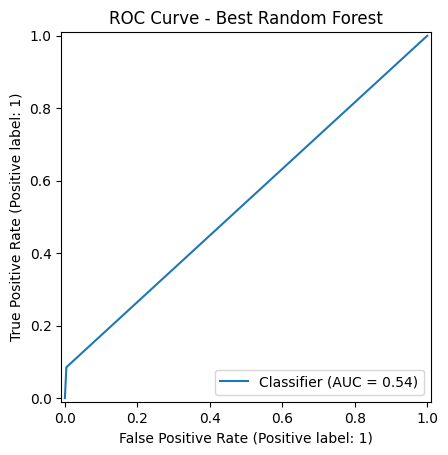

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve - Best Random Forest")
plt.show()

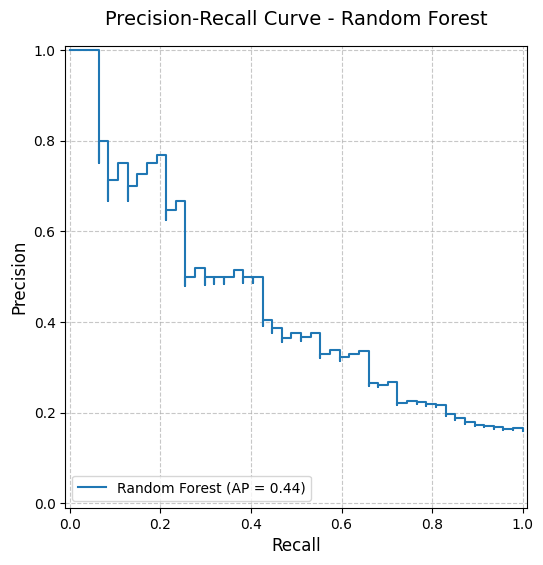

In [ ]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
avg_precision = average_precision_score(y_test, y_pred_proba_rf)

fig, ax = plt.subplots(figsize=(7, 6))
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_pred_proba_rf,
    name=f"Random Forest",
    ax=ax
)
ax.set_title("Precision-Recall Curve - Random Forest", fontsize=14, pad=15)
ax.set_xlabel("Recall", fontsize=12)
ax.set_ylabel("Precision", fontsize=12)
ax.legend(loc="lower left")
ax.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Feature importance**

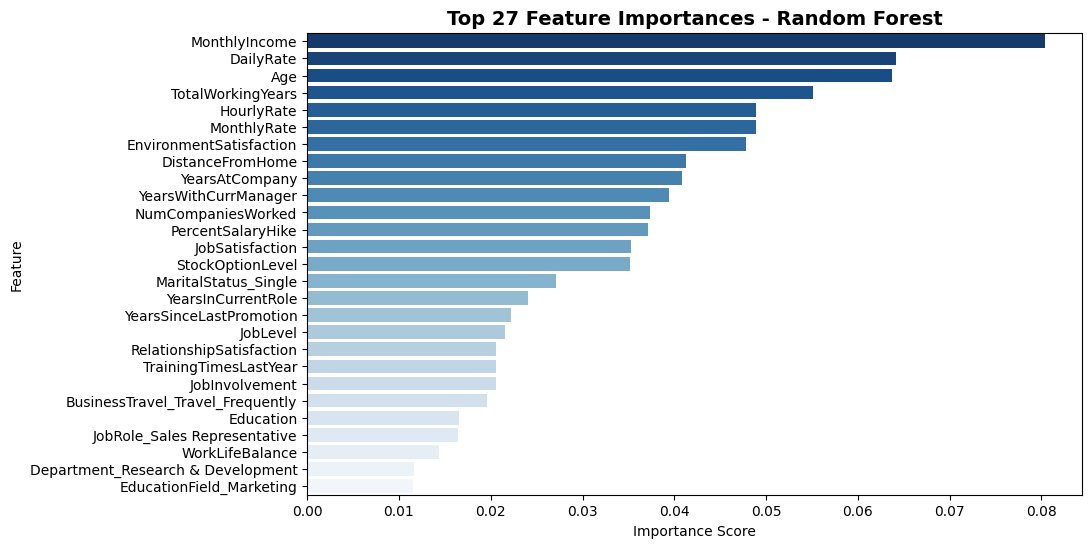

In [ ]:

importance_features = rf.feature_importances_
indices = np.argsort(importance_features)[::-1]
top_features = [X_train.columns[i] for i in indices[:27]]
top_importances = importance_features[indices[:27]]


plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features, palette="Blues_r")
plt.title("Top 27 Feature Importances - Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# **Logistic Regression**

In [ ]:
LR = LogisticRegression(random_state=42)

KF = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(LR, X_train, y_train, cv=KF, scoring='accuracy')
print("Cross-validation scores (LogReg):", cv_scores)

Cross-validation scores (LogReg): [0.8940678  0.83829787 0.81702128 0.83404255 0.88510638]


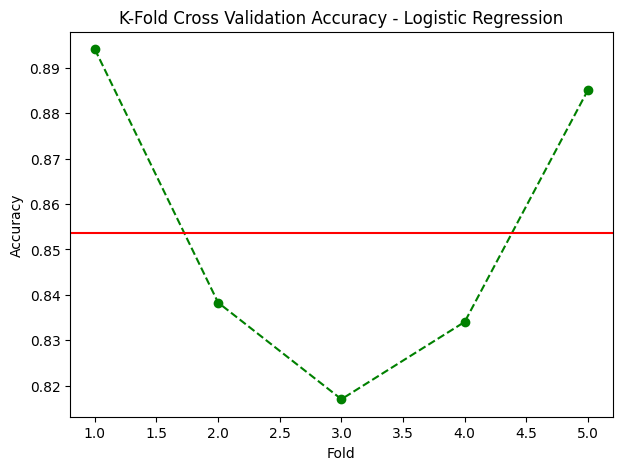

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='--', color='g')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-')
plt.title("K-Fold Cross Validation Accuracy - Logistic Regression")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# Grid Search
param_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
}
grid_search = GridSearchCV(LR, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters (LogReg - Grid):", grid_search.best_params_)
print("Best Accuracy (Grid):", grid_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters (LogReg - Grid): {'C': 0.1, 'penalty': 'l2'}
Best Accuracy (Grid): 0.8596938775510203


In [ ]:
# Random Search
param_dist = {
    'C': np.logspace(-3, 2, 10),
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2']
}
random_search = RandomizedSearchCV(LR, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best Parameters (LogReg - Random):", random_search.best_params_)
print("Best Accuracy (Random):", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters (LogReg - Random): {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(0.1668100537200059)}
Best Accuracy (Random): 0.8613945578231292


Train Accuracy: 0.8673469387755102
Test Accuracy: 0.8571428571428571


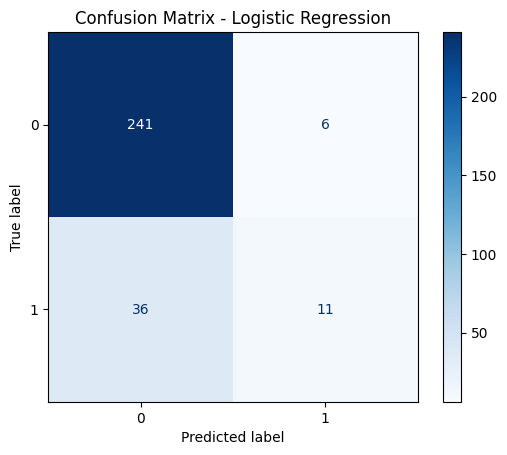

In [ ]:
best_lr = LogisticRegression(**random_search.best_params_, max_iter=5000, random_state=42)
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

print("Train Accuracy:", best_lr.score(X_train, y_train))
print("Test Accuracy:", best_lr.score(X_test, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294



# **SVM**

In [ ]:
SVM = SVC(probability=True, random_state=42)

KF = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(SVM, X_train, y_train, cv=KF, scoring='accuracy')
print("Cross-validation scores (SVM):", cv_scores)


Cross-validation scores (SVM): [0.86440678 0.81276596 0.81702128 0.83404255 0.86382979]


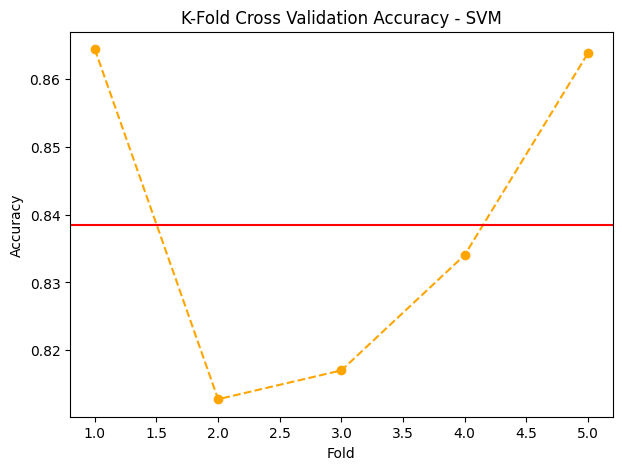

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='--', color='orange')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-')
plt.title("K-Fold Cross Validation Accuracy - SVM")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Grid Search
param_grid = {
    'C': [0.1, 1, 3],
    'kernel': ['linear', 'rbf'],
}
grid_search = GridSearchCV(SVM, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters (SVM - Grid):", grid_search.best_params_)
print("Best Accuracy (Grid):", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters (SVM - Grid): {'C': 3, 'kernel': 'rbf'}
Best Accuracy (Grid): 0.8639455782312925


In [ ]:
# Random Search
param_dist = {
    'C': np.logspace(0.01,1),
    'kernel': ['linear', 'rbf'],
}
random_search = RandomizedSearchCV(SVM, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best Parameters (SVM - Random):", random_search.best_params_)
print("Best Accuracy (Random):", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters (SVM - Random): {'kernel': 'rbf', 'C': np.float64(2.84767089117808)}
Best Accuracy (Random): 0.8639455782312925


Train Accuracy: 0.8835034013605442
Test Accuracy: 0.8639455782312925


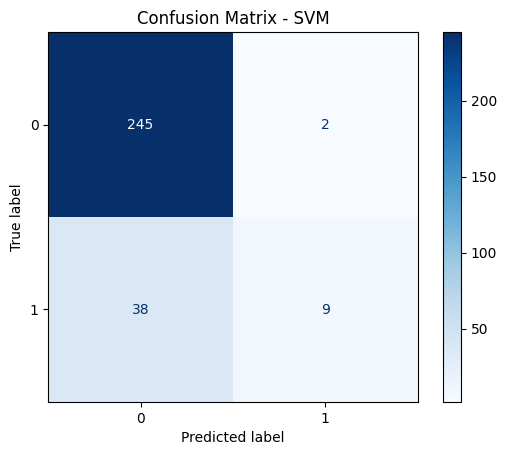

In [ ]:
best_svm = SVC(**random_search.best_params_, probability=True, random_state=42)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

print("Train Accuracy:", best_svm.score(X_train, y_train))
print("Test Accuracy:", best_svm.score(X_test, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.82      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.62       294
weighted avg       0.86      0.86      0.83       294



# **Gradient Boosting**

In [ ]:
GB = GradientBoostingClassifier(random_state=42)

KF = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(GB, X_train, y_train, cv=KF, scoring='accuracy')
print("Cross-validation scores (GB):", cv_scores)

Cross-validation scores (GB): [0.87711864 0.82978723 0.81276596 0.82553191 0.86382979]


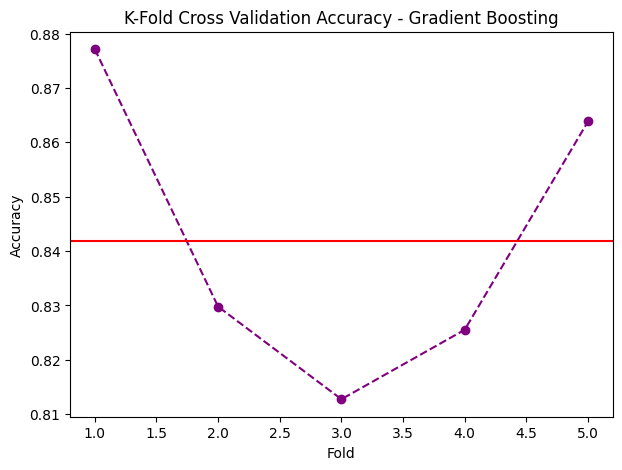

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='--', color='purple')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-')
plt.title("K-Fold Cross Validation Accuracy - Gradient Boosting")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GB, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters (GB - Grid):", grid_search.best_params_)
print("Best Accuracy (Grid):", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters (GB - Grid): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy (Grid): 0.8477891156462585


In [ ]:
# Random Search
param_dist = {
    'n_estimators': np.arange(50, 301, 50).astype(int),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 5, 7, 9]
}
random_search = RandomizedSearchCV(GB, param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best Parameters (GB - Random):", random_search.best_params_)
print("Best Accuracy (Random):", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters (GB - Random): {'n_estimators': np.int64(150), 'max_depth': 5, 'learning_rate': np.float64(0.2677777777777778)}
Best Accuracy (Random): 0.8520408163265306


Train Accuracy: 1.0
Test Accuracy: 0.8435374149659864


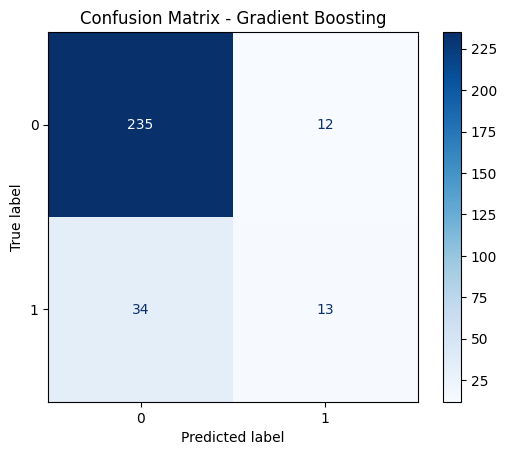

In [ ]:
best_gb = GradientBoostingClassifier(**random_search.best_params_, random_state=42)
best_gb.fit(X_train, y_train)
y_pred = best_gb.predict(X_test)

print("Train Accuracy:", best_gb.score(X_train, y_train))
print("Test Accuracy:", best_gb.score(X_test, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.52      0.28      0.36        47

    accuracy                           0.84       294
   macro avg       0.70      0.61      0.64       294
weighted avg       0.82      0.84      0.82       294



# **Smoteenn**

In [ ]:
df_=df.copy()

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df.drop(df[['OverTime','Gender']],axis=1,inplace=True)

In [ ]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [ ]:
Scaling_features =['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                    'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
sscaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[Scaling_features] = sscaler.fit_transform(X_train[Scaling_features])
X_test_scaled[Scaling_features] = sscaler.transform(X_test[Scaling_features])

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

logistic_reg = LogisticRegression(max_iter=500, random_state=42)
grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", best_model.score(X_test_scaled, y_test))
print('Train Accuracy:' , best_model.score(X_train_scaled, y_train))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Test Accuracy: 0.8537414965986394
Train Accuracy: 0.9173060528559249
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       126
           1       0.89      0.85      0.87       168

    accuracy                           0.85       294
   macro avg       0.85      0.85      0.85       294
weighted avg       0.86      0.85      0.85       294

Confusion Matrix:
 [[108  18]
 [ 25 143]]


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_scaled, y_train)
y_pred = linear_svc.predict(X_test_scaled)
train = linear_svc.score(X_train_scaled, y_train)
test = linear_svc.score(X_test_scaled, y_test)
print("Train Accuracy:", train)
print("Test Accuracy:", test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 0.9198635976129582
Test Accuracy: 0.8537414965986394
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       126
           1       0.89      0.85      0.87       168

    accuracy                           0.85       294
   macro avg       0.85      0.85      0.85       294
weighted avg       0.86      0.85      0.85       294

Confusion Matrix:
 [[108  18]
 [ 25 143]]


In [ ]:
dt = DecisionTreeClassifier(max_depth=9,min_samples_split=7,random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
train_acc = dt.score(X_train_scaled, y_train)
test_acc = dt.score(X_test_scaled, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train Accuracy: 0.9786871270247229
Test Accuracy: 0.8503401360544217
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.89      0.84      0.87       168

    accuracy                           0.85       294
   macro avg       0.85      0.85      0.85       294
weighted avg       0.85      0.85      0.85       294

Confusion Matrix:
 [[109  17]
 [ 27 141]]


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.5, 0.8]
}

xgb = XGBClassifier(eval_metric="logloss", random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=4,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)
train_acc = best_xgb.score(X_train_scaled, y_train)
test_acc = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 4 folds for each of 16 candidates, totalling 64 fits
Train Accuracy: 1.0
Test Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       126
           1       0.94      0.89      0.91       168

    accuracy                           0.90       294
   macro avg       0.90      0.91      0.90       294
weighted avg       0.91      0.90      0.91       294

Confusion Matrix:
 [[117   9]
 [ 19 149]]


In [ ]:
rf = RandomForestClassifier(n_estimators=250,max_depth=27,random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
train = rf.score(X_train_scaled, y_train)
test = rf.score(X_test_scaled, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       126
           1       0.94      0.90      0.92       168

    accuracy                           0.91       294
   macro avg       0.91      0.91      0.91       294
weighted avg       0.91      0.91      0.91       294

Confusion Matrix:
 [[116  10]
 [ 16 152]]
